EDGE DETECTOR (CONVOLUTION)

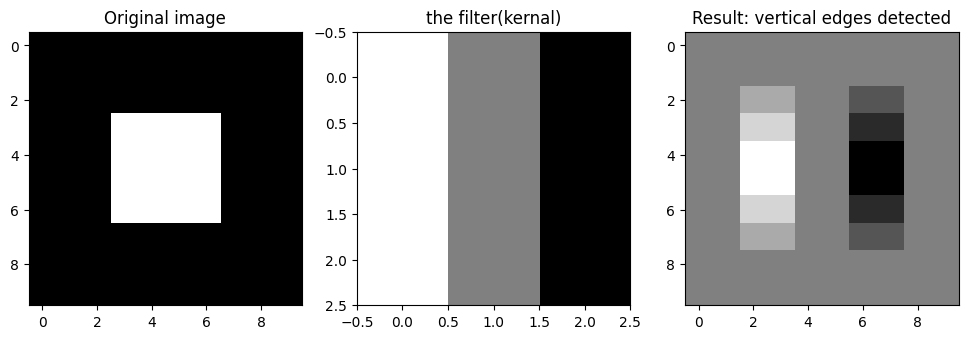

In [2]:
# essential libraries
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# create a synthetic image (a bright square in the middle)
image = np.zeros((10, 10))
image[3:7, 3:7] = 1 # white score (values 1) on black background (value 0)

# define a vertical edge detection kernal (sobel)
# left column is positive, right column is negative
# it highlights changes from bright to dark moving left-to-right
kernal = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# apply convolution (the filter)
# mode = "same" keeps the output size the same as input
output = convolve2d(image, kernal, mode='same')

# visualize 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.imshow(image, cmap='gray')
ax1.set_title("Original image")

ax2.imshow(kernal, cmap='gray')
ax2.set_title("the filter(kernal)")

ax3.imshow(output, cmap='gray')
ax3.set_title("Result: vertical edges detected")

plt.show()




Edge processing in Real 2D image

In [ ]:
%pip install scikit-
%pip install pooch  #to download images from online

  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/11.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.9 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.9 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.9 MB 2.5 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.9 MB 2.5 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.9 MB 2.1 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.9 MB 1.9 MB/s eta 0:00:06
   ------- -------------------------------- 2.4/11.9 MB 1.5 MB/s eta 0:00:07
   -------- ------------------------------- 2.6/11.9 MB 1.6 MB/s eta 0:00:06
   -------- ------------------------------- 2.6/11.9 MB 1.6 MB/s eta 0:00:06
   --------- ------------------------------ 2.9/11.9 MB 1.4 MB/s eta 0:00:07
   ----------- ---------------------------- 3.4/11.9 MB 1.4 MB/s eta 0:00:06
   ------------ -


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


<function matplotlib.pyplot.show(close=None, block=None)>

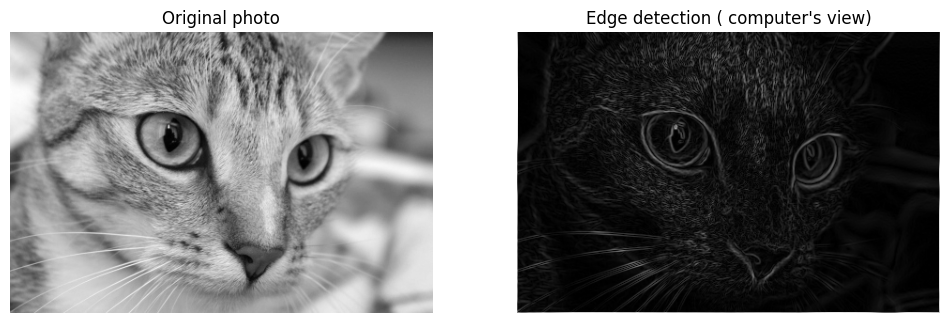

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from scipy.signal import convolve2d

# load a real photo 
# we convert to grayscale because edge detection works in light intensity
image = color.rgb2gray(data.cat())

# define the kernals (the linear algebra filters)
# vertical edge detector (sobel-x)
kernal_v = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# horizontal edge detector (sobel-y)
kernal_h = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# apply convolution (matrix multiplication)
edges_v = convolve2d(image, kernal_v, mode='same')
edges_h = convolve2d(image, kernal_h, mode='same')

# combine them (calculate magnitude)
# this uses the pythagorean theorem to combine vertcal and horizontal intensity
final_edges = np.sqrt(edges_v**2 + edges_h**2)

# visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(image, cmap='gray')
ax1.set_title("Original photo")
ax1.axis("off")

ax2.imshow(final_edges, cmap='gray')
ax2.set_title("Edge detection ( computer's view)")
ax2.axis("off")

plt.show

3D Medical Images

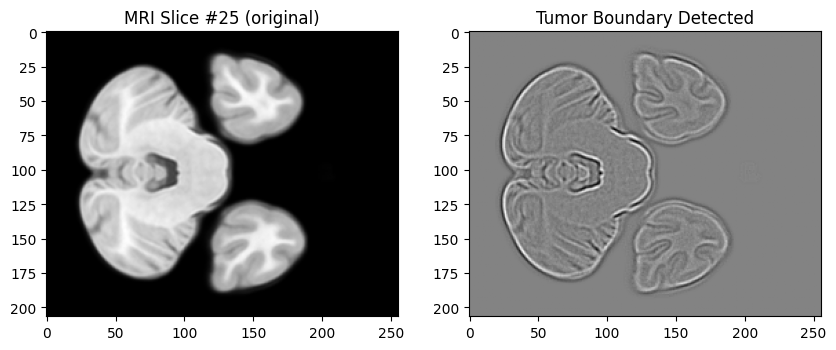

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from scipy.signal import convolve2d

# for the real life .nii file
img_obj = nib.load(r'C:\Users\vigne\Downloads\day5_nii file\mni152.nii')
real_mri_data = img_obj.get_fdata()

# slice the tensor
# lets look at slice #25 (where the tumor is widest)
# we are converting 3D -> 2D here to apply our Linear Algebra tools
slice_25 = real_mri_data[:, :, 50]

# apply the filter (same as before)
kernal = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])       # it is the outline or laplacial kernal
edges = convolve2d(slice_25, kernal, mode = 'same')

# visualize 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

ax1.imshow(slice_25, cmap = 'gray')
ax1.set_title("MRI Slice #25 (original)")

ax2.imshow(edges, cmap = 'gray')
ax2.set_title("Tumor Boundary Detected")

plt.show()

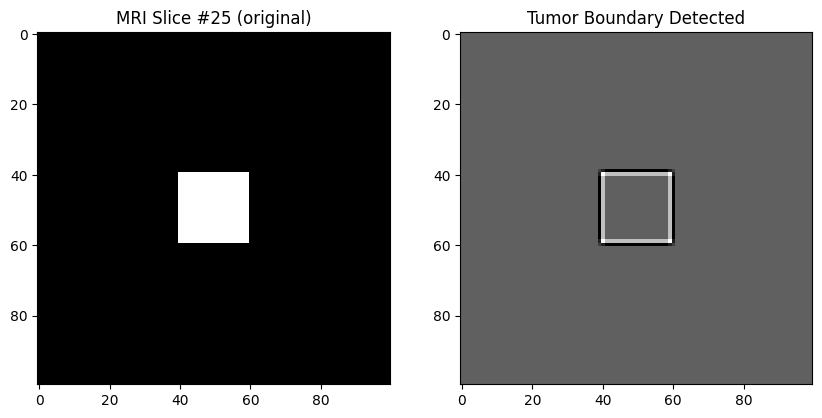

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from scipy.signal import convolve2d

# load the data
# since we don't have a .nii file in our laptop/desktop , we create a fake 3D MRI volume
# dimensions: (Height = 100, Width = 100, Depth/Slice = 50)
fake_mri = np.zeros((100, 100, 50))

# create a Tumor (a bright cube) inside the volume at slice 25
fake_mri[40:60, 40:60, 20:30] = 100

# slice the tensor
# lets look at slice #25 (where the tumor is widest)
# we are converting 3D -> 2D here to apply our Linear Algebra tools
slice_25 = fake_mri[:, :, 25]

# apply the filter (same as before)
kernal = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])       # it is the outline or laplacial kernal
edges = convolve2d(slice_25, kernal, mode = 'same')

# visualize 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

ax1.imshow(slice_25, cmap = 'gray')
ax1.set_title("MRI Slice #25 (original)")

ax2.imshow(edges, cmap = 'gray')
ax2.set_title("Tumor Boundary Detected")

plt.show()

POOLING

In [28]:
import numpy as np
import skimage.measure # for the block operations

# create a 4*4 feature map
# imagine these high numbers (50, 90, 85) are strong edges detected by the previous step
feature_map = np.array([
    [10, 20,  15, 30],
    [12, 50,  10, 5],
    [80, 25,  90, 20],
    [75, 30,  85, 40]
])

print ("Original feature map (4*4):\n", feature_map)

# apply max pooling (2*2 Window)
# we break the image into 2*2 blocks and take the MAX of each block
pooled_map = skimage.measure.block_reduce(feature_map, (2,2), np.max)

print("\nAfter Max Pooling (2,2):\n", pooled_map)

Original feature map (4*4):
 [[10 20 15 30]
 [12 50 10  5]
 [80 25 90 20]
 [75 30 85 40]]

After Max Pooling (2,2):
 [[50 30]
 [80 90]]


2D real Image MAX POOLING

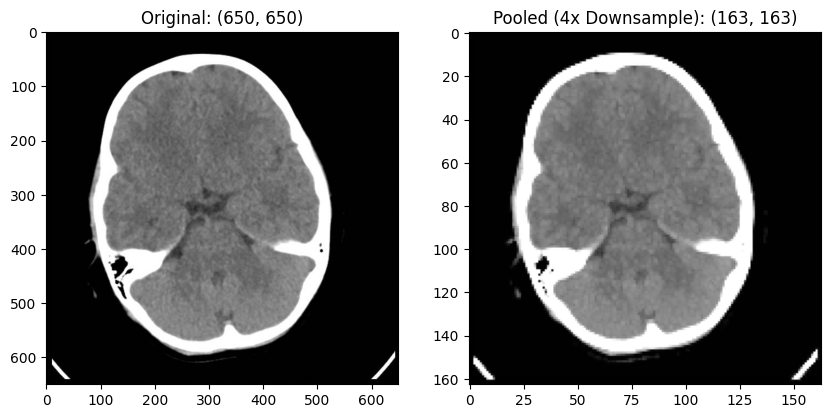

In [30]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage import data, color
from skimage.measure import block_reduce

#load the image
image = plt.imread(r'C:\Users\vigne\Downloads\brain_ct_images_jpg format\CT_intracranial-hemorrhage-detection-and-segmentation-1.0.0\Patients_CT\129\brain\12.jpg')

# apply max pooling
# a (4,4) window means we reduce the size by 4x
# for every 4,4 block of pixels, we keep only the highest value
pooled_image = block_reduce(image, block_size=(4,4), func=np.max)

# visulaization
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.imshow(image, cmap='gray')
ax1.set_title(f"Original: {image.shape}")

ax2.imshow(pooled_image, cmap='gray')
ax2.set_title(f"Pooled (4x Downsample): {pooled_image.shape}")

plt.show()

3D .nii Image MAX POOLING

Original shape: (207, 256, 215)
Pooled shape: (104, 128, 108)


Text(0.5, 1.0, 'Axial View')

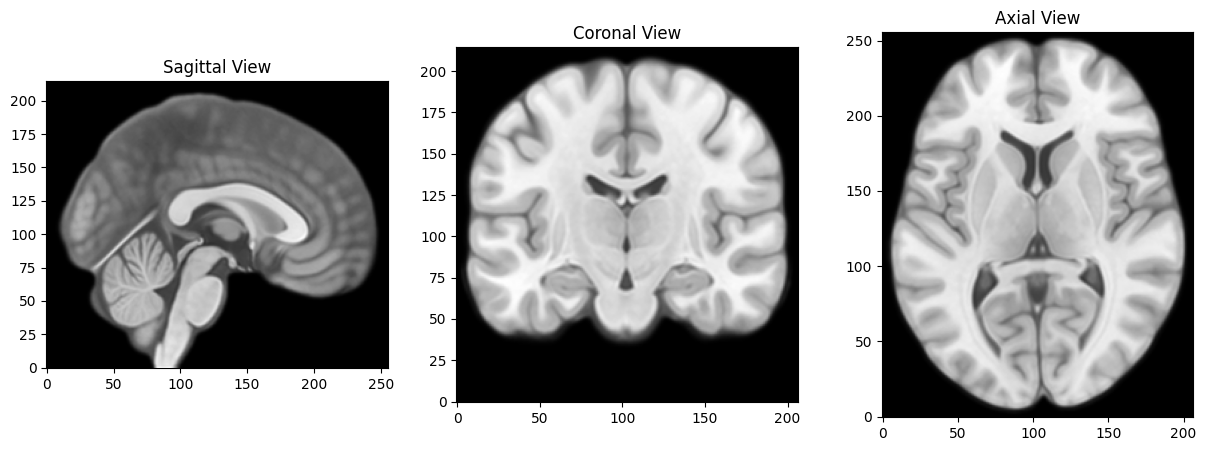

In [40]:
import nibabel as nib
import numpy as np
from skimage.measure import block_reduce
import matplotlib.pyplot as plt

# load the input image 
img = nib.load(r"C:\Users\vigne\Downloads\day5_nii file\mni152.nii")
data_3d = img.get_fdata()

# the 3D pooling operation
# use a (2,2,2) window
# this halves the Height, Width, and the Number of slices (Depth)
pooled_3d = block_reduce(data_3d, block_size=(2,2,2), func=np.max)

print(f"Original shape: {data_3d.shape}")  # (64, 64, 20)
print(f"Pooled shape: {pooled_3d.shape}")  #(32, 32, 10)

# note : In a Unet , this pooled_3d data is what gets passed
# to the next layer of the neural network

# Visualize slices from different angles (Planes)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Middle slice of the 1st dimension (Sagittal)
ax1.imshow(data_3d[data_3d.shape[0]//2, :, :].T, cmap='gray', origin='lower')
ax1.set_title('Sagittal View')

# Middle slice of the 2nd dimension (Coronal)
ax2.imshow(data_3d[:, data_3d.shape[1]//2, :].T, cmap='gray', origin='lower')
ax2.set_title('Coronal View')

# Middle slice of the 3rd dimension (Axial - Top down)
ax3.imshow(data_3d[:, :, data_3d.shape[2]//2].T, cmap='gray', origin='lower')
ax3.set_title('Axial View')
